# Var Implementation
This notebook walks through our Vector Auto Regression implementation as contained in the var_module.py module. 

In [1]:
import var_module as var

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Intialize our custom parameters
Predictors must match available columns exactly. City must match an available city exactly

In [2]:
city = "Atlanta"
order = 4
data_path="pres-data.csv"
predictors = [
    'med_housing',
    'unemployment',
    'housing_listings',
    'population',
    'income'
]

## Initialize & Preprocess data
Ingest the raw data and generate the ouptut data frame with specified predictors

In [3]:
df = var.read_data(path=data_path, predictors=predictors)
df

,year_month,year,month,city,state,med_housing,unemployment,housing_listings,population,income
0,2016.07,2016,7,Atlanta,GA,272000.0000,5.1,14848.0,5791.874,48657.0
1,2016.08,2016,8,Atlanta,GA,269900.0000,5.1,13340.0,5791.874,48657.0
2,2016.09,2016,9,Atlanta,GA,270168.0000,5.1,13404.0,5791.874,48657.0
3,2016.10,2016,10,Atlanta,GA,269900.0000,5.1,12996.0,5791.874,48657.0
4,2016.11,2016,11,Atlanta,GA,269900.0000,5.1,10848.0,5791.874,48657.0
...,...,...,...,...,...,...,...,...,...,...
232,2019.08,2019,8,Tulsa,OK,241185.7143,3.1,1320.0,999.348,56680.0
233,2019.09,2019,9,Tulsa,OK,242685.7143,3.1,1116.0,999.348,56680.0
234,2019.10,2019,10,Tulsa,OK,248950.0000,3.1,1200.0,999.348,56680.0
235,2019.11,2019,11,Tulsa,OK,248500.0000,3.0,908.0,999.348,56680.0


In [4]:
input_df = var.generate_time_data(df=df, city=city, order=order, predictors=predictors)
input_df.tail(15)

C:\Users\whetz\Documents\UVA MSDS\Bayes Machine Learning\Project\bayes-housing-project\final_code\var_module.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["step"] = [i for i in range(order)]


,city_,year_month,med_housing_0,med_housing_1,med_housing_2,med_housing_3,unemployment_0,unemployment_1,unemployment_2,unemployment_3,...,population_3,income_0,income_1,income_2,income_3,med_housing,unemployment,housing_listings,population,income
23,Atlanta,2018.10,339900.0000,330772.0000,325000.0000,324900.0000,3.8,3.7,3.7,3.6,...,5951.394,53354.0,53354.0,53354.0,53354.0,319450.0000,3.7,17204.0,5951.394,53354.0
24,Atlanta,2018.11,330772.0000,325000.0000,324900.0000,319450.0000,3.7,3.7,3.6,3.7,...,5951.394,53354.0,53354.0,53354.0,53354.0,319116.0000,3.7,14788.0,5951.394,53354.0
25,Atlanta,2018.12,325000.0000,324900.0000,319450.0000,319116.0000,3.7,3.6,3.7,3.7,...,5951.394,53354.0,53354.0,53354.0,53354.0,315000.0000,3.7,11948.0,5951.394,53354.0
26,Atlanta,2019.01,324900.0000,319450.0000,319116.0000,315000.0000,3.6,3.7,3.7,3.7,...,5951.394,53354.0,53354.0,53354.0,53354.0,313950.0000,3.7,16000.0,6027.231,55668.0
27,Atlanta,2019.02,319450.0000,319116.0000,315000.0000,313950.0000,3.7,3.7,3.7,3.7,...,6027.231,53354.0,53354.0,53354.0,55668.0,317446.0000,3.7,17880.0,6027.231,55668.0
28,Atlanta,2019.03,319116.0000,315000.0000,313950.0000,317446.0000,3.7,3.7,3.7,3.7,...,6027.231,53354.0,53354.0,55668.0,55668.0,324237.1429,3.6,18440.0,6027.231,55668.0
29,Atlanta,2019.04,315000.0000,313950.0000,317446.0000,324237.1429,3.7,3.7,3.7,3.6,...,6027.231,53354.0,55668.0,55668.0,55668.0,329950.0000,3.6,20836.0,6027.231,55668.0
30,Atlanta,2019.05,313950.0000,317446.0000,324237.1429,329950.0000,3.7,3.7,3.6,3.6,...,6027.231,55668.0,55668.0,55668.0,55668.0,337510.0000,3.5,21296.0,6027.231,55668.0
31,Atlanta,2019.06,317446.0000,324237.1429,329950.0000,337510.0000,3.7,3.6,3.6,3.5,...,6027.231,55668.0,55668.0,55668.0,55668.0,334900.0000,3.4,19756.0,6027.231,55668.0
32,Atlanta,2019.07,324237.1429,329950.0000,337510.0000,334900.0000,3.6,3.6,3.5,3.4,...,6027.231,55668.0,55668.0,55668.0,55668.0,329450.0000,3.3,19136.0,6027.231,55668.0


## Generate pymc3 Model
This will automatically write the code needed to generate a pymc3 model using our predictors that will be used for variational inference. See hidden cell for parameters in the model.

In [5]:
var.write_model_module(input_df=input_df)

import model_builder
model_comb = model_builder.build_model(input_df=input_df)

In [6]:
model_comb

## Generate posterior predictions for our coefficients
This utilizes ADVI implementation of variational inference in pymc3 to generate our posterior predictions (this can take a few minutes)

In [7]:
parameters = var.generate_advi_posterior(model_comb)
parameters

Finished [100%]: Average Loss = 1.4834e+05


,variable,mean,std
0,med_housing_0_med_housing,0.137,0.00598
1,med_housing_1_med_housing,0.164,0.00567
2,med_housing_2_med_housing,0.222,0.00572
3,med_housing_3_med_housing,0.297,0.00582
4,unemployment_0_med_housing,0.503,0.82181
...,...,...,...
95,population_3_income,0.094,0.23712
96,income_0_income,0.068,0.03538
97,income_1_income,0.071,0.03435
98,income_2_income,0.074,0.03251


# Run the forward model 
input the starting time period (formatted yyyy.mm) and the number of steps that you want to advance in your predictions. This will deliver a dataframe with your posterior predictions for however many steps you want to project to. The standard deviation dataframe gives you the spread of each of the predictions.

In [8]:
mean_df, std_df = var.run_projections(order=order, input=input_df, start_year_month=2017.12, samples=1000000, steps=10, parameters=parameters)
mean_df

,city_,year,month,day,date,year_month,med_housing_3
0,Atlanta,2018,1,1,2018-01-01,2018.01,302654.15
1,Atlanta,2018,2,1,2018-02-01,2018.02,301752.81
2,Atlanta,2018,3,1,2018-03-01,2018.03,302226.14
3,Atlanta,2018,4,1,2018-04-01,2018.04,339930.32
4,Atlanta,2018,5,1,2018-05-01,2018.05,322400.01
5,Atlanta,2018,6,1,2018-06-01,2018.06,317501.29
6,Atlanta,2018,7,1,2018-07-01,2018.07,340522.37
7,Atlanta,2018,8,1,2018-08-01,2018.08,438544.77
8,Atlanta,2018,9,1,2018-09-01,2018.09,238990.66
9,Atlanta,2018,10,1,2018-10-01,2018.10,231111.76


In [9]:
std_df

,city_,year,month,day,date,year_month,med_housing_3
0,Atlanta,2018,1,1,2018-01-01,2018.01,6243.09
1,Atlanta,2018,2,1,2018-02-01,2018.02,6288.96
2,Atlanta,2018,3,1,2018-03-01,2018.03,16652.42
3,Atlanta,2018,4,1,2018-04-01,2018.04,19425.28
4,Atlanta,2018,5,1,2018-05-01,2018.05,28101.88
5,Atlanta,2018,6,1,2018-06-01,2018.06,37169.33
6,Atlanta,2018,7,1,2018-07-01,2018.07,44029.87
7,Atlanta,2018,8,1,2018-08-01,2018.08,84887.50
8,Atlanta,2018,9,1,2018-09-01,2018.09,152227.56
9,Atlanta,2018,10,1,2018-10-01,2018.10,82152.49


# Visualize

/content/var_module.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line1["type"] = "actual"


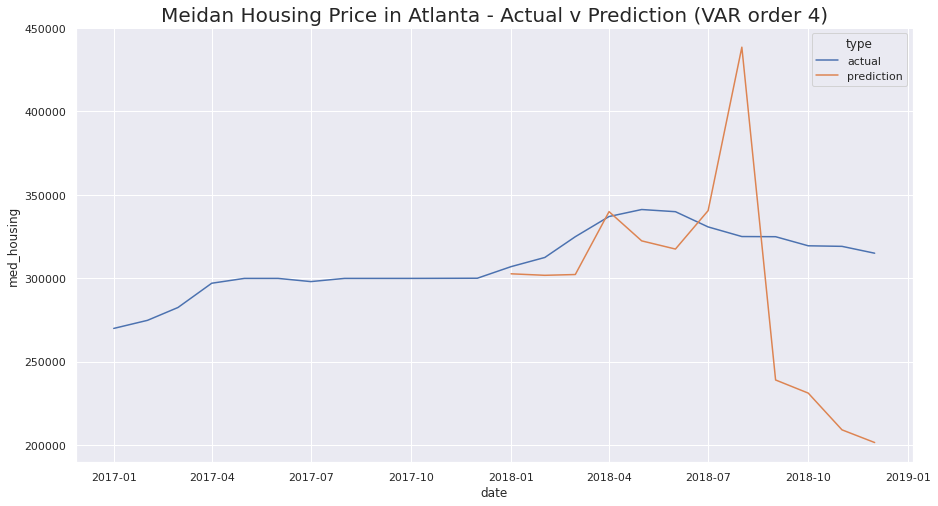

In [10]:
var.generate_comparative_lineplot(df=df, mean_df=mean_df, start_year=2017, max_year=2018, city='Atlanta', order=4)

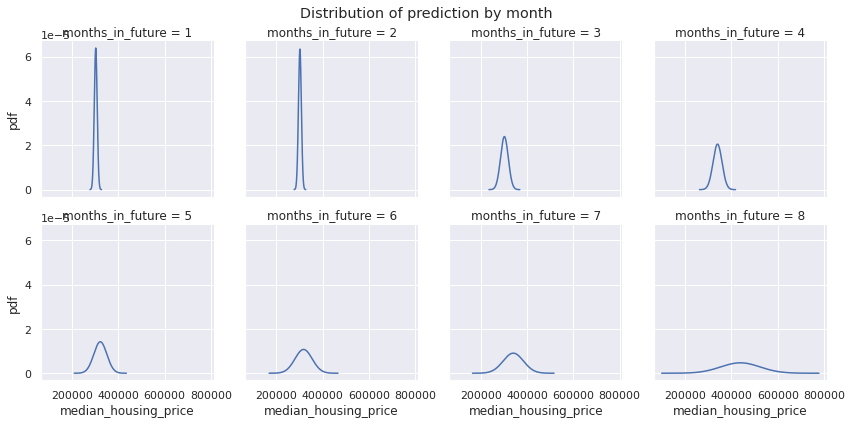

In [11]:
var.plot_uncertainty(mean_df=mean_df, std_df=std_df, steps=8)